In [69]:
import warnings
warnings.filterwarnings('ignore')

import numpy
import iris
import iris.iterate
import matplotlib.pyplot as plt
import matplotlib.cm as cm       

In [70]:
%matplotlib inline

In [71]:
tfile = '/g/data/ua6/DRSv2/CMIP5/CCSM4/historical/mon/ocean/r1i1p1/thetao/latest/thetao_Omon_CCSM4_historical_r1i1p1_200001-200512.nc'
sfile = '/g/data/ua6/DRSv2/CMIP5/CCSM4/historical/mon/ocean/r1i1p1/so/latest/so_Omon_CCSM4_historical_r1i1p1_200001-200512.nc'
vfile = '/g/data/r87/dbi599/DRSv2/CMIP5/CCSM4/historical/fx/ocean/r0i0p0/volcello/latest/volcello-inferred_fx_CCSM4_historical_r0i0p0.nc'
bfile = '/g/data/r87/dbi599/DRSv2/CMIP5/CCSM4/historical/fx/ocean/r0i0p0/basin/latest/basin_fx_CCSM4_historical_r0i0p0.nc'

In [72]:
tcube = iris.load_cube(tfile)
scube = iris.load_cube(sfile)
vcube = iris.load_cube(vfile)
bcube = iris.load_cube(bfile)

In [73]:
tcube = tcube.collapsed('time', iris.analysis.MEAN)
scube = scube.collapsed('time', iris.analysis.MEAN)

In [74]:
tcube.data = tcube.data - 273.15
scube.data = scube.data * 1000

## plt.hexbin

One approach is to use [plt.hexbin](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hexbin.html).

In [8]:
xdata = scube.data.flatten()
ydata = tcube.data.flatten()
cdata = vcube.data.flatten()

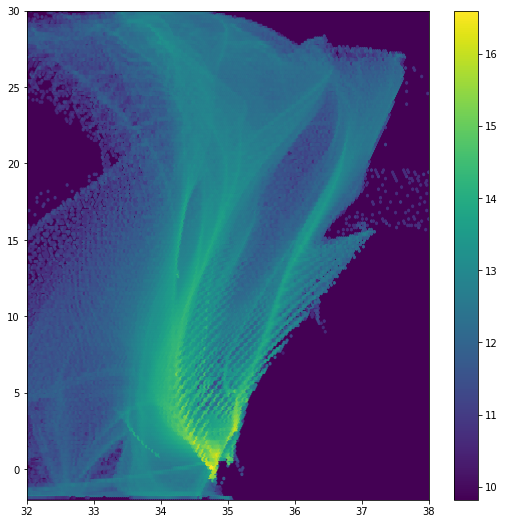

In [9]:
fig = plt.figure(figsize=[9, 9])

ax = fig.add_subplot(111, facecolor=cm.viridis(0))

plt.hexbin(xdata, ydata, C=cdata, reduce_C_function=numpy.sum,
           gridsize=200, bins='log', extent=(32, 38, -2, 30))  #mincnt=16
#plt.axis([xmin, xmax, ymin, ymax])
#plt.title("With a log color scale")
cb = plt.colorbar()  # extend='min'
plt.ylim(-2, 30)
plt.xlim(32, 38)
#cb.set_label('log10(N)')
plt.show()

The problem is that I don't have the actual bin values in order to create a difference plot. In order to get those, I could run [scipy.stats.binned_statistic_2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic_2d.html). I'd then have to use a heat mapping package to create the plot.

## pandas.DataFrame.plot.hexbin

In pandas you might use [pandas.DataFrame.plot.hexbin](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html) instead.

In [76]:
basin_names = {0: 'land', 1: 'southern ocean', 2: 'atlantic', 
               3: 'pacific', 4: 'arctic', 5: 'indian', 
               6: 'mediterranean', 7: 'black sea', 8: 'hudson bay',
               9: 'baltic sea', 10: 'red sea'}

In [88]:
coord_names = [coord.name() for coord in tcube.dim_coords]
for tslice, sslice, vslice, bslice in iris.iterate.izip(tcube, scube, vcube, bcube):
    if not type(tslice.data) == numpy.ma.core.MaskedArray:
        print('temperature:', tslice.data)
        print('salinity:', sslice.data)
        print('latitude:', tslice.coord('latitude').points[0])
        print('longitude:', tslice.coord('longitude').points[0])
        print('depth:', tslice.coord('depth').points[0])
        print('volume:', vslice.data)
        print('basin:', basin_names[bslice.data.item()])

temperature: -1.8019714
salinity: 34.459194
latitude: -78.15209
longitude: 320.5625
depth: 5.0
volume: 15253077760.0
basin: atlantic
temperature: -1.8024597
salinity: 34.45873
latitude: -78.15209
longitude: 321.6875
depth: 5.0
volume: 15253077760.0
basin: atlantic
temperature: -1.802063
salinity: 34.45856
latitude: -78.15209
longitude: 322.8125
depth: 5.0
volume: 15253077760.0
basin: atlantic
temperature: -1.4935913
salinity: 34.223984
latitude: -78.15209
longitude: 194.5625
depth: 5.0
volume: 15253077760.0
basin: pacific
temperature: -1.4745789
salinity: 34.227604
latitude: -78.15209
longitude: 195.6875
depth: 5.0
volume: 15253077760.0
basin: pacific
temperature: -1.4554749
salinity: 34.229282
latitude: -78.15209
longitude: 196.8125
depth: 5.0
volume: 15253077760.0
basin: pacific
temperature: -1.4386902
salinity: 34.23006
latitude: -78.15209
longitude: 197.9375
depth: 5.0
volume: 15253077760.0
basin: pacific
temperature: -1.8076782
salinity: 34.456173
latitude: -77.617874
longitude: 3

temperature: -1.540741
salinity: 34.28884
latitude: -77.08366
longitude: 185.5625
depth: 5.0
volume: 16606187520.0
basin: pacific
temperature: -1.563446
salinity: 34.278374
latitude: -77.08366
longitude: 186.6875
depth: 5.0
volume: 16606187520.0
basin: pacific
temperature: -1.5787048
salinity: 34.26922
latitude: -77.08366
longitude: 187.8125
depth: 5.0
volume: 16606187520.0
basin: pacific
temperature: -1.5884094
salinity: 34.26083
latitude: -77.08366
longitude: 188.9375
depth: 5.0
volume: 16606187520.0
basin: pacific
temperature: -1.5935364
salinity: 34.253033
latitude: -77.08366
longitude: 190.0625
depth: 5.0
volume: 16606187520.0
basin: pacific
temperature: -1.5978699
salinity: 34.243797
latitude: -77.08366
longitude: 191.1875
depth: 5.0
volume: 16606187520.0
basin: pacific
temperature: -1.6005859
salinity: 34.23293
latitude: -77.08366
longitude: 192.3125
depth: 5.0
volume: 16606187520.0
basin: pacific
temperature: -1.6009521
salinity: 34.22028
latitude: -77.08366
longitude: 193.4375

basin: pacific
temperature: -1.7214661
salinity: 34.111897
latitude: -76.54944
longitude: 200.1875
depth: 5.0
volume: 17280605440.0
basin: pacific
temperature: -1.7341003
salinity: 34.10298
latitude: -76.54944
longitude: 201.3125
depth: 5.0
volume: 17280605440.0
basin: pacific
temperature: -1.7523804
salinity: 34.092323
latitude: -76.54944
longitude: 202.4375
depth: 5.0
volume: 17280605440.0
basin: pacific
temperature: -1.7606201
salinity: 34.086693
latitude: -76.54944
longitude: 203.5625
depth: 5.0
volume: 17280605440.0
basin: pacific
temperature: -1.7643127
salinity: 34.083374
latitude: -76.54944
longitude: 204.6875
depth: 5.0
volume: 17280605440.0
basin: pacific
temperature: -1.7650452
salinity: 34.08084
latitude: -76.54944
longitude: 205.8125
depth: 5.0
volume: 17280605440.0
basin: pacific
temperature: -1.7614441
salinity: 34.07922
latitude: -76.54944
longitude: 206.9375
depth: 5.0
volume: 17280605440.0
basin: pacific
temperature: -1.7515564
salinity: 34.079227
latitude: -76.54944


volume: 17953523200.0
basin: pacific
temperature: -1.7574768
salinity: 34.088375
latitude: -76.01522
longitude: 202.4375
depth: 5.0
volume: 17953523200.0
basin: pacific
temperature: -1.7620239
salinity: 34.083202
latitude: -76.01522
longitude: 203.5625
depth: 5.0
volume: 17953523200.0
basin: pacific
temperature: -1.7642822
salinity: 34.078987
latitude: -76.01522
longitude: 204.6875
depth: 5.0
volume: 17953523200.0
basin: pacific
temperature: -1.7649231
salinity: 34.07546
latitude: -76.01522
longitude: 205.8125
depth: 5.0
volume: 17953523200.0
basin: pacific
temperature: -1.7637329
salinity: 34.07266
latitude: -76.01522
longitude: 206.9375
depth: 5.0
volume: 17953523200.0
basin: pacific
temperature: -1.7611694
salinity: 34.070744
latitude: -76.01522
longitude: 208.0625
depth: 5.0
volume: 17953523200.0
basin: pacific
temperature: -1.7587585
salinity: 34.069363
latitude: -76.01522
longitude: 209.1875
depth: 5.0
volume: 17953523200.0
basin: pacific
temperature: -1.756897
salinity: 34.06929

volume: 18624878080.0
basin: pacific
temperature: -1.7484131
salinity: 34.08867
latitude: -75.481
longitude: 201.3125
depth: 5.0
volume: 18624878080.0
basin: pacific
temperature: -1.7540894
salinity: 34.08091
latitude: -75.481
longitude: 202.4375
depth: 5.0
volume: 18624878080.0
basin: pacific
temperature: -1.7579956
salinity: 34.07441
latitude: -75.481
longitude: 203.5625
depth: 5.0
volume: 18624878080.0
basin: pacific
temperature: -1.7604065
salinity: 34.068825
latitude: -75.481
longitude: 204.6875
depth: 5.0
volume: 18624878080.0
basin: pacific
temperature: -1.7624817
salinity: 34.064213
latitude: -75.481
longitude: 205.8125
depth: 5.0
volume: 18624878080.0
basin: pacific
temperature: -1.7638245
salinity: 34.060505
latitude: -75.481
longitude: 206.9375
depth: 5.0
volume: 18624878080.0
basin: pacific
temperature: -1.765564
salinity: 34.05766
latitude: -75.481
longitude: 208.0625
depth: 5.0
volume: 18624878080.0
basin: pacific
temperature: -1.7677612
salinity: 34.0555
latitude: -75.48

basin: pacific
temperature: -1.6130066
salinity: 34.228146
latitude: -74.946785
longitude: 190.0625
depth: 5.0
volume: 19294613760.0
basin: pacific
temperature: -1.6279602
salinity: 34.214565
latitude: -74.946785
longitude: 191.1875
depth: 5.0
volume: 19294613760.0
basin: pacific
temperature: -1.6408386
salinity: 34.200268
latitude: -74.946785
longitude: 192.3125
depth: 5.0
volume: 19294613760.0
basin: pacific
temperature: -1.6523438
salinity: 34.18521
latitude: -74.946785
longitude: 193.4375
depth: 5.0
volume: 19294613760.0
basin: pacific
temperature: -1.6647949
salinity: 34.169502
latitude: -74.946785
longitude: 194.5625
depth: 5.0
volume: 19294613760.0
basin: pacific
temperature: -1.6781311
salinity: 34.15358
latitude: -74.946785
longitude: 195.6875
depth: 5.0
volume: 19294613760.0
basin: pacific
temperature: -1.6916809
salinity: 34.137054
latitude: -74.946785
longitude: 196.8125
depth: 5.0
volume: 19294613760.0
basin: pacific
temperature: -1.7059631
salinity: 34.120255
latitude: -7

temperature: -1.1907349
salinity: 34.558964
latitude: -74.41257
longitude: 170.9375
depth: 5.0
volume: 19962672640.0
basin: pacific
temperature: -1.1727295
salinity: 34.537224
latitude: -74.41257
longitude: 172.0625
depth: 5.0
volume: 19962672640.0
basin: pacific
temperature: -1.1775818
salinity: 34.51396
latitude: -74.41257
longitude: 173.1875
depth: 5.0
volume: 19962672640.0
basin: pacific
temperature: -1.1972656
salinity: 34.48978
latitude: -74.41257
longitude: 174.3125
depth: 5.0
volume: 19962672640.0
basin: pacific
temperature: -1.2263489
salinity: 34.465797
latitude: -74.41257
longitude: 175.4375
depth: 5.0
volume: 19962672640.0
basin: pacific
temperature: -1.2561951
salinity: 34.44401
latitude: -74.41257
longitude: 176.5625
depth: 5.0
volume: 19962672640.0
basin: pacific
temperature: -1.2802429
salinity: 34.428455
latitude: -74.41257
longitude: 177.6875
depth: 5.0
volume: 19962672640.0
basin: pacific
temperature: -1.2969055
salinity: 34.42204
latitude: -74.41257
longitude: 178.8

volume: 19962672640.0
basin: atlantic
temperature: -1.7810059
salinity: 34.443752
latitude: -74.41257
longitude: 309.3125
depth: 5.0
volume: 19962672640.0
basin: atlantic
temperature: -1.7814026
salinity: 34.436844
latitude: -74.41257
longitude: 310.4375
depth: 5.0
volume: 19962672640.0
basin: atlantic
temperature: -1.7809753
salinity: 34.430344
latitude: -74.41257
longitude: 311.5625
depth: 5.0
volume: 19962672640.0
basin: atlantic
temperature: -1.7784119
salinity: 34.424686
latitude: -74.41257
longitude: 312.6875
depth: 5.0
volume: 19962672640.0
basin: atlantic
temperature: -1.7779541
salinity: 34.41825
latitude: -74.41257
longitude: 313.8125
depth: 5.0
volume: 19962672640.0
basin: atlantic
temperature: -1.7746887
salinity: 34.412754
latitude: -74.41257
longitude: 314.9375
depth: 5.0
volume: 19962672640.0
basin: atlantic
temperature: -1.7724915
salinity: 34.406845
latitude: -74.41257
longitude: 316.0625
depth: 5.0
volume: 19962672640.0
basin: atlantic
temperature: -1.7689819
salinity

basin: pacific
temperature: -1.7606506
salinity: 34.00249
latitude: -73.87835
longitude: 209.1875
depth: 5.0
volume: 20628994560.0
basin: pacific
temperature: -1.7644043
salinity: 34.001183
latitude: -73.87835
longitude: 210.3125
depth: 5.0
volume: 20628994560.0
basin: pacific
temperature: -1.7680359
salinity: 34.0013
latitude: -73.87835
longitude: 211.4375
depth: 5.0
volume: 20628994560.0
basin: pacific
temperature: -1.7710876
salinity: 34.0025
latitude: -73.87835
longitude: 212.5625
depth: 5.0
volume: 20628994560.0
basin: pacific
temperature: -1.7735901
salinity: 34.004196
latitude: -73.87835
longitude: 213.6875
depth: 5.0
volume: 20628994560.0
basin: pacific
temperature: -1.7756958
salinity: 34.00622
latitude: -73.87835
longitude: 214.8125
depth: 5.0
volume: 20628994560.0
basin: pacific
temperature: -1.7775574
salinity: 34.00813
latitude: -73.87835
longitude: 215.9375
depth: 5.0
volume: 20628994560.0
basin: pacific
temperature: -1.7790527
salinity: 34.009796
latitude: -73.87835
long

volume: 21293524480.0
basin: atlantic
temperature: -1.7945557
salinity: 34.148712
latitude: -73.34413
longitude: 337.4375
depth: 5.0
volume: 21293524480.0
basin: atlantic
temperature: -1.7875366
salinity: 34.14418
latitude: -73.34413
longitude: 338.5625
depth: 5.0
volume: 21293524480.0
basin: atlantic
temperature: -1.4844666
salinity: 34.485027
latitude: -73.34413
longitude: 169.8125
depth: 5.0
volume: 21293524480.0
basin: pacific
temperature: -1.3978882
salinity: 34.488667
latitude: -73.34413
longitude: 170.9375
depth: 5.0
volume: 21293524480.0
basin: pacific
temperature: -1.3024902
salinity: 34.494373
latitude: -73.34413
longitude: 172.0625
depth: 5.0
volume: 21293524480.0
basin: pacific
temperature: -1.240387
salinity: 34.488525
latitude: -73.34413
longitude: 173.1875
depth: 5.0
volume: 21293524480.0
basin: pacific
temperature: -1.2181091
salinity: 34.473103
latitude: -73.34413
longitude: 174.3125
depth: 5.0
volume: 21293524480.0
basin: pacific
temperature: -1.2321472
salinity: 34.4

temperature: -1.7839966
salinity: 34.03838
latitude: -73.34413
longitude: 239.5625
depth: 5.0
volume: 21293524480.0
basin: pacific
temperature: -1.7841797
salinity: 34.039
latitude: -73.34413
longitude: 240.6875
depth: 5.0
volume: 21293524480.0
basin: pacific
temperature: -1.7861023
salinity: 34.03669
latitude: -73.34413
longitude: 241.8125
depth: 5.0
volume: 21293524480.0
basin: pacific
temperature: -1.7880859
salinity: 34.032173
latitude: -73.34413
longitude: 242.9375
depth: 5.0
volume: 21293524480.0
basin: pacific
temperature: -1.7902222
salinity: 34.025005
latitude: -73.34413
longitude: 244.0625
depth: 5.0
volume: 21293524480.0
basin: pacific
temperature: -1.7914734
salinity: 34.015736
latitude: -73.34413
longitude: 245.1875
depth: 5.0
volume: 21293524480.0
basin: pacific
temperature: -1.7949524
salinity: 34.00396
latitude: -73.34413
longitude: 246.3125
depth: 5.0
volume: 21293524480.0
basin: pacific
temperature: -1.7976379
salinity: 33.99225
latitude: -73.34413
longitude: 247.4375

basin: pacific
temperature: -1.4701843
salinity: 34.35302
latitude: -72.80991
longitude: 179.9375
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.4945984
salinity: 34.33882
latitude: -72.80991
longitude: 181.0625
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.5135803
salinity: 34.324047
latitude: -72.80991
longitude: 182.1875
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.5417175
salinity: 34.30428
latitude: -72.80991
longitude: 183.3125
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.5663452
salinity: 34.283325
latitude: -72.80991
longitude: 184.4375
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.5852661
salinity: 34.262253
latitude: -72.80991
longitude: 185.5625
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.6003418
salinity: 34.241383
latitude: -72.80991
longitude: 186.6875
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.6134033
salinity: 34.221348
latitude: -72.80991


basin: pacific
temperature: -1.7496643
salinity: 33.968513
latitude: -72.80991
longitude: 250.8125
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.7376709
salinity: 33.964413
latitude: -72.80991
longitude: 251.9375
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.7247009
salinity: 33.963154
latitude: -72.80991
longitude: 253.0625
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.7055969
salinity: 33.967888
latitude: -72.80991
longitude: 254.1875
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.6824036
salinity: 33.98152
latitude: -72.80991
longitude: 255.3125
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.6633606
salinity: 33.998177
latitude: -72.80991
longitude: 256.4375
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.8316956
salinity: 33.86652
latitude: -72.80991
longitude: 274.4375
depth: 5.0
volume: 21956200960.0
basin: pacific
temperature: -1.8319702
salinity: 33.878494
latitude: -72.80991

volume: 22616972800.0
basin: pacific
temperature: -1.575531
salinity: 34.280594
latitude: -72.275696
longitude: 184.4375
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.5939331
salinity: 34.259636
latitude: -72.275696
longitude: 185.5625
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.6083679
salinity: 34.238358
latitude: -72.275696
longitude: 186.6875
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.6208801
salinity: 34.217033
latitude: -72.275696
longitude: 187.8125
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.6321716
salinity: 34.196205
latitude: -72.275696
longitude: 188.9375
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.6442566
salinity: 34.175842
latitude: -72.275696
longitude: 190.0625
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.6579285
salinity: 34.155586
latitude: -72.275696
longitude: 191.1875
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.6703796
salinity:

volume: 22616972800.0
basin: pacific
temperature: -1.7259216
salinity: 33.93945
latitude: -72.275696
longitude: 256.4375
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.8146667
salinity: 33.83418
latitude: -72.275696
longitude: 265.4375
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.8194275
salinity: 33.83508
latitude: -72.275696
longitude: 266.5625
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.8175354
salinity: 33.840084
latitude: -72.275696
longitude: 267.6875
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.8183899
salinity: 33.844334
latitude: -72.275696
longitude: 268.8125
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.819519
salinity: 33.847633
latitude: -72.275696
longitude: 269.9375
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.8222351
salinity: 33.84849
latitude: -72.275696
longitude: 271.0625
depth: 5.0
volume: 22616972800.0
basin: pacific
temperature: -1.8276062
salinity: 33.

volume: 23275773440.0
basin: pacific
temperature: -1.3607483
salinity: 34.419777
latitude: -71.74148
longitude: 174.3125
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.3969421
salinity: 34.402607
latitude: -71.74148
longitude: 175.4375
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.432373
salinity: 34.38606
latitude: -71.74148
longitude: 176.5625
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.4601746
salinity: 34.36975
latitude: -71.74148
longitude: 177.6875
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.495758
salinity: 34.352955
latitude: -71.74148
longitude: 178.8125
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.5249329
salinity: 34.338226
latitude: -71.74148
longitude: 179.9375
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.5401001
salinity: 34.324963
latitude: -71.74148
longitude: 181.0625
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.552063
salinity: 34.311157


basin: pacific
temperature: -1.7231445
salinity: 33.97219
latitude: -71.74148
longitude: 245.1875
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.7195129
salinity: 33.966675
latitude: -71.74148
longitude: 246.3125
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.7150574
salinity: 33.961166
latitude: -71.74148
longitude: 247.4375
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.7148132
salinity: 33.954987
latitude: -71.74148
longitude: 248.5625
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.7168274
salinity: 33.9471
latitude: -71.74148
longitude: 249.6875
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.7255554
salinity: 33.93789
latitude: -71.74148
longitude: 250.8125
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.733429
salinity: 33.927567
latitude: -71.74148
longitude: 251.9375
depth: 5.0
volume: 23275773440.0
basin: pacific
temperature: -1.7418823
salinity: 33.916348
latitude: -71.74148
lo

temperature: -1.781311
salinity: 34.1442
latitude: -71.20726
longitude: 334.0625
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.7849731
salinity: 34.133392
latitude: -71.20726
longitude: 335.1875
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.7878113
salinity: 34.122997
latitude: -71.20726
longitude: 336.3125
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.7895813
salinity: 34.113174
latitude: -71.20726
longitude: 337.4375
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.7922058
salinity: 34.103207
latitude: -71.20726
longitude: 338.5625
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.7932434
salinity: 34.094433
latitude: -71.20726
longitude: 339.6875
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.7934265
salinity: 34.086636
latitude: -71.20726
longitude: 340.8125
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.7935181
salinity: 34.07983
latitude: -71.20726
longitude

temperature: -1.7217102
salinity: 33.88165
latitude: -71.20726
longitude: 227.1875
depth: 5.0
volume: 23932554240.0
basin: pacific
temperature: -1.7201538
salinity: 33.89135
latitude: -71.20726
longitude: 228.3125
depth: 5.0
volume: 23932554240.0
basin: pacific
temperature: -1.7221375
salinity: 33.900517
latitude: -71.20726
longitude: 229.4375
depth: 5.0
volume: 23932554240.0
basin: pacific
temperature: -1.7264099
salinity: 33.908955
latitude: -71.20726
longitude: 230.5625
depth: 5.0
volume: 23932554240.0
basin: pacific
temperature: -1.7302856
salinity: 33.91713
latitude: -71.20726
longitude: 231.6875
depth: 5.0
volume: 23932554240.0
basin: pacific
temperature: -1.7330017
salinity: 33.924908
latitude: -71.20726
longitude: 232.8125
depth: 5.0
volume: 23932554240.0
basin: pacific
temperature: -1.7346802
salinity: 33.932922
latitude: -71.20726
longitude: 233.9375
depth: 5.0
volume: 23932554240.0
basin: pacific
temperature: -1.736969
salinity: 33.94016
latitude: -71.20726
longitude: 235.06

volume: 23932554240.0
basin: atlantic
temperature: -1.7622681
salinity: 34.337746
latitude: -71.20726
longitude: 313.8125
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.763977
salinity: 34.33188
latitude: -71.20726
longitude: 314.9375
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.765564
salinity: 34.32396
latitude: -71.20726
longitude: 316.0625
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.7673035
salinity: 34.31448
latitude: -71.20726
longitude: 317.1875
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.7691956
salinity: 34.303947
latitude: -71.20726
longitude: 318.3125
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.7704773
salinity: 34.29262
latitude: -71.20726
longitude: 319.4375
depth: 5.0
volume: 23932554240.0
basin: atlantic
temperature: -1.766449
salinity: 34.26504
latitude: -70.673035
longitude: 320.5625
depth: 5.0
volume: 24587253760.0
basin: atlantic
temperature: -1.7675476
salinity: 34.2

volume: 24587253760.0
basin: pacific
temperature: -1.7081299
salinity: 33.93131
latitude: -70.673035
longitude: 202.4375
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.710968
salinity: 33.90803
latitude: -70.673035
longitude: 203.5625
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.7140808
salinity: 33.88507
latitude: -70.673035
longitude: 204.6875
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.7162476
salinity: 33.862957
latitude: -70.673035
longitude: 205.8125
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.7173767
salinity: 33.842472
latitude: -70.673035
longitude: 206.9375
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.7176208
salinity: 33.824127
latitude: -70.673035
longitude: 208.0625
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.7176819
salinity: 33.808292
latitude: -70.673035
longitude: 209.1875
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.7177429
salinity: 33

temperature: -1.7960205
salinity: 33.806458
latitude: -70.673035
longitude: 272.1875
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.7937012
salinity: 33.807293
latitude: -70.673035
longitude: 273.3125
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.7948914
salinity: 33.804234
latitude: -70.673035
longitude: 274.4375
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.7951355
salinity: 33.799126
latitude: -70.673035
longitude: 275.5625
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.7980347
salinity: 33.790787
latitude: -70.673035
longitude: 276.6875
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.8002625
salinity: 33.78072
latitude: -70.673035
longitude: 277.8125
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.7997742
salinity: 33.769444
latitude: -70.673035
longitude: 278.9375
depth: 5.0
volume: 24587253760.0
basin: pacific
temperature: -1.8027344
salinity: 33.754356
latitude: -70.673035
longi

temperature: -1.6081238
salinity: 34.38471
latitude: -70.13882
longitude: 163.0625
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.5490417
salinity: 34.408558
latitude: -70.13882
longitude: 164.1875
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.5462952
salinity: 34.436035
latitude: -70.13882
longitude: 165.3125
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.52771
salinity: 34.44526
latitude: -70.13882
longitude: 166.4375
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.5343323
salinity: 34.440086
latitude: -70.13882
longitude: 167.5625
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.5207214
salinity: 34.434425
latitude: -70.13882
longitude: 168.6875
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.4820557
salinity: 34.431953
latitude: -70.13882
longitude: 169.8125
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.4647522
salinity: 34.42235
latitude: -70.13882
longitude: 170.93

temperature: -1.7145691
salinity: 33.87656
latitude: -70.13882
longitude: 235.0625
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.7117615
salinity: 33.883068
latitude: -70.13882
longitude: 236.1875
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.7072449
salinity: 33.88967
latitude: -70.13882
longitude: 237.3125
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.7037354
salinity: 33.895073
latitude: -70.13882
longitude: 238.4375
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.699585
salinity: 33.89895
latitude: -70.13882
longitude: 239.5625
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.6950684
salinity: 33.901207
latitude: -70.13882
longitude: 240.6875
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.6896057
salinity: 33.90205
latitude: -70.13882
longitude: 241.8125
depth: 5.0
volume: 25239813120.0
basin: pacific
temperature: -1.6850891
salinity: 33.901352
latitude: -70.13882
longitude: 242.93

volume: 25890181120.0
basin: atlantic
temperature: -1.7522278
salinity: 34.222744
latitude: -69.6046
longitude: 321.6875
depth: 5.0
volume: 25890181120.0
basin: atlantic
temperature: -1.7536926
salinity: 34.213734
latitude: -69.6046
longitude: 322.8125
depth: 5.0
volume: 25890181120.0
basin: atlantic
temperature: -1.7553406
salinity: 34.205036
latitude: -69.6046
longitude: 323.9375
depth: 5.0
volume: 25890181120.0
basin: atlantic
temperature: -1.7571411
salinity: 34.19669
latitude: -69.6046
longitude: 325.0625
depth: 5.0
volume: 25890181120.0
basin: atlantic
temperature: -1.7588196
salinity: 34.18845
latitude: -69.6046
longitude: 326.1875
depth: 5.0
volume: 25890181120.0
basin: atlantic
temperature: -1.7597351
salinity: 34.180004
latitude: -69.6046
longitude: 327.3125
depth: 5.0
volume: 25890181120.0
basin: atlantic
temperature: -1.7604675
salinity: 34.171555
latitude: -69.6046
longitude: 328.4375
depth: 5.0
volume: 25890181120.0
basin: atlantic
temperature: -1.7606812
salinity: 34.162

basin: pacific
temperature: -1.5191956
salinity: 34.421524
latitude: -69.6046
longitude: 168.6875
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.5040894
salinity: 34.41338
latitude: -69.6046
longitude: 169.8125
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.5019226
salinity: 34.40114
latitude: -69.6046
longitude: 170.9375
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.50531
salinity: 34.38933
latitude: -69.6046
longitude: 172.0625
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.5118713
salinity: 34.376923
latitude: -69.6046
longitude: 173.1875
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.5201111
salinity: 34.364937
latitude: -69.6046
longitude: 174.3125
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.5309143
salinity: 34.35177
latitude: -69.6046
longitude: 175.4375
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.5420227
salinity: 34.337814
latitude: -69.6046
longitude: 

basin: pacific
temperature: -1.6925964
salinity: 33.86286
latitude: -69.6046
longitude: 239.5625
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.6887207
salinity: 33.865276
latitude: -69.6046
longitude: 240.6875
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.6841431
salinity: 33.866203
latitude: -69.6046
longitude: 241.8125
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.6802063
salinity: 33.86556
latitude: -69.6046
longitude: 242.9375
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.6759949
salinity: 33.86377
latitude: -69.6046
longitude: 244.0625
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.6715393
salinity: 33.861355
latitude: -69.6046
longitude: 245.1875
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.6666565
salinity: 33.859062
latitude: -69.6046
longitude: 246.3125
depth: 5.0
volume: 25890181120.0
basin: pacific
temperature: -1.6617737
salinity: 33.85742
latitude: -69.6046
longitude

basin: atlantic
temperature: -1.742157
salinity: 34.19962
latitude: -69.07037
longitude: 322.8125
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7443542
salinity: 34.191982
latitude: -69.07037
longitude: 323.9375
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7466736
salinity: 34.18468
latitude: -69.07037
longitude: 325.0625
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7486267
salinity: 34.17733
latitude: -69.07037
longitude: 326.1875
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7498474
salinity: 34.16987
latitude: -69.07037
longitude: 327.3125
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.750824
salinity: 34.162502
latitude: -69.07037
longitude: 328.4375
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7514648
salinity: 34.155163
latitude: -69.07037
longitude: 329.5625
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7524109
salinity: 34.147903
latitude: -69.0

volume: 26538296320.0
basin: indian
temperature: -1.7627869
salinity: 33.82693
latitude: -69.07037
longitude: 74.1875
depth: 5.0
volume: 26538296320.0
basin: indian
temperature: -1.7463074
salinity: 33.833508
latitude: -69.07037
longitude: 75.3125
depth: 5.0
volume: 26538296320.0
basin: indian
temperature: -1.7190552
salinity: 33.848686
latitude: -69.07037
longitude: 76.4375
depth: 5.0
volume: 26538296320.0
basin: indian
temperature: -1.7239075
salinity: 34.358715
latitude: -69.07037
longitude: 158.5625
depth: 5.0
volume: 26538296320.0
basin: pacific
temperature: -1.696991
salinity: 34.363613
latitude: -69.07037
longitude: 159.6875
depth: 5.0
volume: 26538296320.0
basin: pacific
temperature: -1.6740723
salinity: 34.361652
latitude: -69.07037
longitude: 160.8125
depth: 5.0
volume: 26538296320.0
basin: pacific
temperature: -1.6326294
salinity: 34.368824
latitude: -69.07037
longitude: 161.9375
depth: 5.0
volume: 26538296320.0
basin: pacific
temperature: -1.5996704
salinity: 34.37622
latit

basin: pacific
temperature: -1.7032776
salinity: 33.732365
latitude: -69.07037
longitude: 227.1875
depth: 5.0
volume: 26538296320.0
basin: pacific
temperature: -1.7055359
salinity: 33.749073
latitude: -69.07037
longitude: 228.3125
depth: 5.0
volume: 26538296320.0
basin: pacific
temperature: -1.706543
salinity: 33.76473
latitude: -69.07037
longitude: 229.4375
depth: 5.0
volume: 26538296320.0
basin: pacific
temperature: -1.7076416
salinity: 33.777863
latitude: -69.07037
longitude: 230.5625
depth: 5.0
volume: 26538296320.0
basin: pacific
temperature: -1.708313
salinity: 33.78808
latitude: -69.07037
longitude: 231.6875
depth: 5.0
volume: 26538296320.0
basin: pacific
temperature: -1.7068787
salinity: 33.796
latitude: -69.07037
longitude: 232.8125
depth: 5.0
volume: 26538296320.0
basin: pacific
temperature: -1.704071
salinity: 33.80243
latitude: -69.07037
longitude: 233.9375
depth: 5.0
volume: 26538296320.0
basin: pacific
temperature: -1.7005005
salinity: 33.807835
latitude: -69.07037
longit

basin: atlantic
temperature: -1.7288208
salinity: 34.282436
latitude: -69.07037
longitude: 310.4375
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7292175
salinity: 34.276688
latitude: -69.07037
longitude: 311.5625
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7302246
salinity: 34.270977
latitude: -69.07037
longitude: 312.6875
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7313538
salinity: 34.26442
latitude: -69.07037
longitude: 313.8125
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7320862
salinity: 34.256138
latitude: -69.07037
longitude: 314.9375
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7327576
salinity: 34.24717
latitude: -69.07037
longitude: 316.0625
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7335815
salinity: 34.23857
latitude: -69.07037
longitude: 317.1875
depth: 5.0
volume: 26538296320.0
basin: atlantic
temperature: -1.7346191
salinity: 34.23053
latitude: -69

basin: atlantic
temperature: -1.7789001
salinity: 33.75814
latitude: -68.536156
longitude: 20.1875
depth: 5.0
volume: 27184104960.0
basin: atlantic
temperature: -1.7748718
salinity: 33.746635
latitude: -68.536156
longitude: 21.3125
depth: 5.0
volume: 27184104960.0
basin: atlantic
temperature: -1.7724304
salinity: 33.734257
latitude: -68.536156
longitude: 22.4375
depth: 5.0
volume: 27184104960.0
basin: atlantic
temperature: -1.7696228
salinity: 33.722534
latitude: -68.536156
longitude: 23.5625
depth: 5.0
volume: 27184104960.0
basin: indian
temperature: -1.7667542
salinity: 33.712242
latitude: -68.536156
longitude: 24.6875
depth: 5.0
volume: 27184104960.0
basin: indian
temperature: -1.7642517
salinity: 33.702766
latitude: -68.536156
longitude: 25.8125
depth: 5.0
volume: 27184104960.0
basin: indian
temperature: -1.763855
salinity: 33.694324
latitude: -68.536156
longitude: 26.9375
depth: 5.0
volume: 27184104960.0
basin: indian
temperature: -1.7660828
salinity: 33.686275
latitude: -68.53615

volume: 27184104960.0
basin: pacific
temperature: -1.6628113
salinity: 34.00306
latitude: -68.536156
longitude: 197.9375
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.6682129
salinity: 33.977688
latitude: -68.536156
longitude: 199.0625
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.6725769
salinity: 33.950954
latitude: -68.536156
longitude: 200.1875
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.6770935
salinity: 33.92325
latitude: -68.536156
longitude: 201.3125
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.6810913
salinity: 33.895676
latitude: -68.536156
longitude: 202.4375
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.684845
salinity: 33.869358
latitude: -68.536156
longitude: 203.5625
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.68927
salinity: 33.84425
latitude: -68.536156
longitude: 204.6875
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.6934509
salinity: 33.8

temperature: -1.6399231
salinity: 33.690105
latitude: -68.536156
longitude: 267.6875
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.6478882
salinity: 33.690308
latitude: -68.536156
longitude: 268.8125
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.6561584
salinity: 33.692257
latitude: -68.536156
longitude: 269.9375
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.6608582
salinity: 33.695713
latitude: -68.536156
longitude: 271.0625
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.662384
salinity: 33.700584
latitude: -68.536156
longitude: 272.1875
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.6613464
salinity: 33.706184
latitude: -68.536156
longitude: 273.3125
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.6576843
salinity: 33.711685
latitude: -68.536156
longitude: 274.4375
depth: 5.0
volume: 27184104960.0
basin: pacific
temperature: -1.6558533
salinity: 33.716915
latitude: -68.536156
longi

basin: atlantic
temperature: -1.7627563
salinity: 34.06171
latitude: -68.00193
longitude: 345.3125
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.7647705
salinity: 34.05434
latitude: -68.00193
longitude: 346.4375
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.7669067
salinity: 34.046616
latitude: -68.00193
longitude: 347.5625
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.7692566
salinity: 34.039394
latitude: -68.00193
longitude: 348.6875
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.7720032
salinity: 34.032455
latitude: -68.00193
longitude: 349.8125
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.7750854
salinity: 34.025394
latitude: -68.00193
longitude: 350.9375
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.7775879
salinity: 34.01877
latitude: -68.00193
longitude: 352.0625
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.7809753
salinity: 34.01212
latitude: -68

temperature: -1.7496948
salinity: 34.324753
latitude: -68.00193
longitude: 155.1875
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.7384949
salinity: 34.334827
latitude: -68.00193
longitude: 156.3125
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.7217407
salinity: 34.341267
latitude: -68.00193
longitude: 157.4375
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.7015991
salinity: 34.345413
latitude: -68.00193
longitude: 158.5625
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.6736755
salinity: 34.34808
latitude: -68.00193
longitude: 159.6875
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.6465149
salinity: 34.347816
latitude: -68.00193
longitude: 160.8125
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.6276855
salinity: 34.346733
latitude: -68.00193
longitude: 161.9375
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.6134033
salinity: 34.344154
latitude: -68.00193
longitude: 16

volume: 27827548160.0
basin: pacific
temperature: -1.6704102
salinity: 33.647198
latitude: -68.00193
longitude: 226.0625
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.6757507
salinity: 33.661003
latitude: -68.00193
longitude: 227.1875
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.6798706
salinity: 33.675304
latitude: -68.00193
longitude: 228.3125
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.682373
salinity: 33.689034
latitude: -68.00193
longitude: 229.4375
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.6837769
salinity: 33.701157
latitude: -68.00193
longitude: 230.5625
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.6836243
salinity: 33.71129
latitude: -68.00193
longitude: 231.6875
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.6821289
salinity: 33.719406
latitude: -68.00193
longitude: 232.8125
depth: 5.0
volume: 27827548160.0
basin: pacific
temperature: -1.6800232
salinity: 33.7258

volume: 27827548160.0
basin: atlantic
temperature: -1.7051697
salinity: 34.26183
latitude: -68.00193
longitude: 307.0625
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.698761
salinity: 34.255283
latitude: -68.00193
longitude: 308.1875
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.6969604
salinity: 34.24931
latitude: -68.00193
longitude: 309.3125
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.6974792
salinity: 34.244022
latitude: -68.00193
longitude: 310.4375
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.6989441
salinity: 34.239223
latitude: -68.00193
longitude: 311.5625
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.6990051
salinity: 34.234215
latitude: -68.00193
longitude: 312.6875
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.697876
salinity: 34.228725
latitude: -68.00193
longitude: 313.8125
depth: 5.0
volume: 27827548160.0
basin: atlantic
temperature: -1.6974182
salinity: 3

volume: 28468574720.0
basin: atlantic
temperature: -1.7624512
salinity: 33.787304
latitude: -67.46771
longitude: 17.9375
depth: 5.0
volume: 28468574720.0
basin: atlantic
temperature: -1.7609558
salinity: 33.77643
latitude: -67.46771
longitude: 19.0625
depth: 5.0
volume: 28468574720.0
basin: atlantic
temperature: -1.7590332
salinity: 33.765648
latitude: -67.46771
longitude: 20.1875
depth: 5.0
volume: 28468574720.0
basin: atlantic
temperature: -1.7558289
salinity: 33.755005
latitude: -67.46771
longitude: 21.3125
depth: 5.0
volume: 28468574720.0
basin: atlantic
temperature: -1.7542725
salinity: 33.743202
latitude: -67.46771
longitude: 22.4375
depth: 5.0
volume: 28468574720.0
basin: atlantic
temperature: -1.7536011
salinity: 33.73098
latitude: -67.46771
longitude: 23.5625
depth: 5.0
volume: 28468574720.0
basin: indian
temperature: -1.7553406
salinity: 33.71857
latitude: -67.46771
longitude: 24.6875
depth: 5.0
volume: 28468574720.0
basin: indian
temperature: -1.7585754
salinity: 33.705845
l

volume: 28468574720.0
basin: pacific
temperature: -1.5272522
salinity: 34.223717
latitude: -67.46771
longitude: 175.4375
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.5245056
salinity: 34.211296
latitude: -67.46771
longitude: 176.5625
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.5241394
salinity: 34.2009
latitude: -67.46771
longitude: 177.6875
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.5266724
salinity: 34.19417
latitude: -67.46771
longitude: 178.8125
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.5310974
salinity: 34.190575
latitude: -67.46771
longitude: 179.9375
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.5353699
salinity: 34.18906
latitude: -67.46771
longitude: 181.0625
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.5401917
salinity: 34.18917
latitude: -67.46771
longitude: 182.1875
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.545166
salinity: 34.188385
l

temperature: -1.5912781
salinity: 33.697426
latitude: -67.46771
longitude: 247.4375
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.5880432
salinity: 33.701942
latitude: -67.46771
longitude: 248.5625
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.5840759
salinity: 33.704624
latitude: -67.46771
longitude: 249.6875
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.576477
salinity: 33.70359
latitude: -67.46771
longitude: 250.8125
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.5647278
salinity: 33.698483
latitude: -67.46771
longitude: 251.9375
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.5508423
salinity: 33.690758
latitude: -67.46771
longitude: 253.0625
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.5379639
salinity: 33.68308
latitude: -67.46771
longitude: 254.1875
depth: 5.0
volume: 28468574720.0
basin: pacific
temperature: -1.5266418
salinity: 33.676544
latitude: -67.46771
longitude: 255.

volume: 29107125760.0
basin: atlantic
temperature: -1.6966248
salinity: 34.13644
latitude: -66.93349
longitude: 326.1875
depth: 5.0
volume: 29107125760.0
basin: atlantic
temperature: -1.70224
salinity: 34.133003
latitude: -66.93349
longitude: 327.3125
depth: 5.0
volume: 29107125760.0
basin: atlantic
temperature: -1.7073059
salinity: 34.129642
latitude: -66.93349
longitude: 328.4375
depth: 5.0
volume: 29107125760.0
basin: atlantic
temperature: -1.7111511
salinity: 34.126
latitude: -66.93349
longitude: 329.5625
depth: 5.0
volume: 29107125760.0
basin: atlantic
temperature: -1.7141113
salinity: 34.121838
latitude: -66.93349
longitude: 330.6875
depth: 5.0
volume: 29107125760.0
basin: atlantic
temperature: -1.7177429
salinity: 34.11748
latitude: -66.93349
longitude: 331.8125
depth: 5.0
volume: 29107125760.0
basin: atlantic
temperature: -1.7193298
salinity: 34.112606
latitude: -66.93349
longitude: 332.9375
depth: 5.0
volume: 29107125760.0
basin: atlantic
temperature: -1.7209778
salinity: 34.1

volume: 29107125760.0
basin: indian
temperature: -1.7663269
salinity: 33.606895
latitude: -66.93349
longitude: 39.3125
depth: 5.0
volume: 29107125760.0
basin: indian
temperature: -1.7622375
salinity: 33.602863
latitude: -66.93349
longitude: 40.4375
depth: 5.0
volume: 29107125760.0
basin: indian
temperature: -1.7597046
salinity: 33.59636
latitude: -66.93349
longitude: 41.5625
depth: 5.0
volume: 29107125760.0
basin: indian
temperature: -1.7558594
salinity: 33.58874
latitude: -66.93349
longitude: 42.6875
depth: 5.0
volume: 29107125760.0
basin: indian
temperature: -1.7526855
salinity: 33.58096
latitude: -66.93349
longitude: 43.8125
depth: 5.0
volume: 29107125760.0
basin: indian
temperature: -1.7501831
salinity: 33.56971
latitude: -66.93349
longitude: 44.9375
depth: 5.0
volume: 29107125760.0
basin: indian
temperature: -1.7498779
salinity: 33.550365
latitude: -66.93349
longitude: 46.0625
depth: 5.0
volume: 29107125760.0
basin: indian
temperature: -1.7161255
salinity: 33.55054
latitude: -66.9

basin: pacific
temperature: -1.5280457
salinity: 34.152966
latitude: -66.93349
longitude: 183.3125
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.533905
salinity: 34.15177
latitude: -66.93349
longitude: 184.4375
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.5395813
salinity: 34.148582
latitude: -66.93349
longitude: 185.5625
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.545929
salinity: 34.143684
latitude: -66.93349
longitude: 186.6875
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.5531921
salinity: 34.136524
latitude: -66.93349
longitude: 187.8125
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.5624084
salinity: 34.12684
latitude: -66.93349
longitude: 188.9375
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.572113
salinity: 34.11454
latitude: -66.93349
longitude: 190.0625
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.5823975
salinity: 34.09993
latitude: -66.93349
long

temperature: -1.4915771
salinity: 33.638115
latitude: -66.93349
longitude: 254.1875
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.4768066
salinity: 33.63118
latitude: -66.93349
longitude: 255.3125
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.4635315
salinity: 33.6261
latitude: -66.93349
longitude: 256.4375
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.4511719
salinity: 33.622322
latitude: -66.93349
longitude: 257.5625
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.4387207
salinity: 33.618614
latitude: -66.93349
longitude: 258.6875
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.4250488
salinity: 33.614384
latitude: -66.93349
longitude: 259.8125
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.4111938
salinity: 33.61022
latitude: -66.93349
longitude: 260.9375
depth: 5.0
volume: 29107125760.0
basin: pacific
temperature: -1.400116
salinity: 33.607033
latitude: -66.93349
longitude: 262.06

basin: atlantic
temperature: -1.7091675
salinity: 34.103996
latitude: -66.39927
longitude: 332.9375
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.7117004
salinity: 34.09889
latitude: -66.39927
longitude: 334.0625
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.7132874
salinity: 34.09324
latitude: -66.39927
longitude: 335.1875
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.7146606
salinity: 34.087204
latitude: -66.39927
longitude: 336.3125
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.7158508
salinity: 34.080795
latitude: -66.39927
longitude: 337.4375
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.7154236
salinity: 34.074
latitude: -66.39927
longitude: 338.5625
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.7153015
salinity: 34.067276
latitude: -66.39927
longitude: 339.6875
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.7155762
salinity: 34.06079
latitude: -66.3

temperature: -1.7294617
salinity: 33.56713
latitude: -66.39927
longitude: 44.9375
depth: 5.0
volume: 29743144960.0
basin: indian
temperature: -1.7294617
salinity: 33.555473
latitude: -66.39927
longitude: 46.0625
depth: 5.0
volume: 29743144960.0
basin: indian
temperature: -1.7223816
salinity: 33.55033
latitude: -66.39927
longitude: 47.1875
depth: 5.0
volume: 29743144960.0
basin: indian
temperature: -1.707489
salinity: 33.552135
latitude: -66.39927
longitude: 48.3125
depth: 5.0
volume: 29743144960.0
basin: indian
temperature: -1.6972961
salinity: 33.558037
latitude: -66.39927
longitude: 49.4375
depth: 5.0
volume: 29743144960.0
basin: indian
temperature: -1.7492065
salinity: 33.509098
latitude: -66.39927
longitude: 57.3125
depth: 5.0
volume: 29743144960.0
basin: indian
temperature: -1.6980286
salinity: 33.5432
latitude: -66.39927
longitude: 58.4375
depth: 5.0
volume: 29743144960.0
basin: indian
temperature: -1.6351929
salinity: 33.583088
latitude: -66.39927
longitude: 59.5625
depth: 5.0
v

temperature: -1.5975342
salinity: 34.293716
latitude: -66.39927
longitude: 159.6875
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5887451
salinity: 34.285294
latitude: -66.39927
longitude: 160.8125
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5795593
salinity: 34.275158
latitude: -66.39927
longitude: 161.9375
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5715027
salinity: 34.26134
latitude: -66.39927
longitude: 163.0625
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.56427
salinity: 34.245415
latitude: -66.39927
longitude: 164.1875
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5596924
salinity: 34.229263
latitude: -66.39927
longitude: 165.3125
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5549927
salinity: 34.212933
latitude: -66.39927
longitude: 166.4375
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5477295
salinity: 34.199223
latitude: -66.39927
longitude: 167.

basin: pacific
temperature: -1.5696106
salinity: 33.588608
latitude: -66.39927
longitude: 230.5625
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5729065
salinity: 33.59533
latitude: -66.39927
longitude: 231.6875
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5738525
salinity: 33.60075
latitude: -66.39927
longitude: 232.8125
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5740967
salinity: 33.605232
latitude: -66.39927
longitude: 233.9375
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5741577
salinity: 33.608757
latitude: -66.39927
longitude: 235.0625
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5729675
salinity: 33.610905
latitude: -66.39927
longitude: 236.1875
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5687561
salinity: 33.61136
latitude: -66.39927
longitude: 237.3125
depth: 5.0
volume: 29743144960.0
basin: pacific
temperature: -1.5604248
salinity: 33.610344
latitude: -66.39927


basin: atlantic
temperature: -1.6045532
salinity: 34.199078
latitude: -66.39927
longitude: 308.1875
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.6174927
salinity: 34.18905
latitude: -66.39927
longitude: 309.3125
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.6274109
salinity: 34.181103
latitude: -66.39927
longitude: 310.4375
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.634552
salinity: 34.175262
latitude: -66.39927
longitude: 311.5625
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.6390076
salinity: 34.170338
latitude: -66.39927
longitude: 312.6875
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.6379089
salinity: 34.165005
latitude: -66.39927
longitude: 313.8125
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.6351013
salinity: 34.15922
latitude: -66.39927
longitude: 314.9375
depth: 5.0
volume: 29743144960.0
basin: atlantic
temperature: -1.6312256
salinity: 34.1535
latitude: -66.

basin: atlantic
temperature: -1.7193604
salinity: 33.73403
latitude: -65.86504
longitude: 19.0625
depth: 5.0
volume: 30376578560.0
basin: atlantic
temperature: -1.7173157
salinity: 33.721523
latitude: -65.86504
longitude: 20.1875
depth: 5.0
volume: 30376578560.0
basin: atlantic
temperature: -1.7158508
salinity: 33.710003
latitude: -65.86504
longitude: 21.3125
depth: 5.0
volume: 30376578560.0
basin: atlantic
temperature: -1.7150879
salinity: 33.69933
latitude: -65.86504
longitude: 22.4375
depth: 5.0
volume: 30376578560.0
basin: atlantic
temperature: -1.7148132
salinity: 33.689037
latitude: -65.86504
longitude: 23.5625
depth: 5.0
volume: 30376578560.0
basin: indian
temperature: -1.7152405
salinity: 33.679096
latitude: -65.86504
longitude: 24.6875
depth: 5.0
volume: 30376578560.0
basin: indian
temperature: -1.7172546
salinity: 33.669815
latitude: -65.86504
longitude: 25.8125
depth: 5.0
volume: 30376578560.0
basin: indian
temperature: -1.7214355
salinity: 33.661465
latitude: -65.86504
long

temperature: -1.7492371
salinity: 34.05048
latitude: -65.86504
longitude: 104.5625
depth: 5.0
volume: 30376578560.0
basin: indian
temperature: -1.6984253
salinity: 34.078106
latitude: -65.86504
longitude: 105.6875
depth: 5.0
volume: 30376578560.0
basin: indian
temperature: -1.657196
salinity: 34.0996
latitude: -65.86504
longitude: 106.8125
depth: 5.0
volume: 30376578560.0
basin: indian
temperature: -1.6215515
salinity: 34.111015
latitude: -65.86504
longitude: 107.9375
depth: 5.0
volume: 30376578560.0
basin: indian
temperature: -1.6003113
salinity: 34.112293
latitude: -65.86504
longitude: 109.0625
depth: 5.0
volume: 30376578560.0
basin: indian
temperature: -1.6225281
salinity: 34.089893
latitude: -65.86504
longitude: 110.1875
depth: 5.0
volume: 30376578560.0
basin: indian
temperature: -1.6318054
salinity: 34.09238
latitude: -65.86504
longitude: 111.3125
depth: 5.0
volume: 30376578560.0
basin: indian
temperature: -1.7680969
salinity: 33.909515
latitude: -65.86504
longitude: 114.6875
dept

volume: 30376578560.0
basin: pacific
temperature: -1.4266663
salinity: 34.05432
latitude: -65.86504
longitude: 178.8125
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.4316101
salinity: 34.055107
latitude: -65.86504
longitude: 179.9375
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.4355164
salinity: 34.056118
latitude: -65.86504
longitude: 181.0625
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.4399109
salinity: 34.05846
latitude: -65.86504
longitude: 182.1875
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.4479065
salinity: 34.0636
latitude: -65.86504
longitude: 183.3125
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.4572449
salinity: 34.070267
latitude: -65.86504
longitude: 184.4375
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.4681091
salinity: 34.076122
latitude: -65.86504
longitude: 185.5625
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.4784851
salinity: 34.079456

basin: pacific
temperature: -1.3925476
salinity: 33.57223
latitude: -65.86504
longitude: 250.8125
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.3757629
salinity: 33.56768
latitude: -65.86504
longitude: 251.9375
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.3521423
salinity: 33.560677
latitude: -65.86504
longitude: 253.0625
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.3270569
salinity: 33.553684
latitude: -65.86504
longitude: 254.1875
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.3031311
salinity: 33.548412
latitude: -65.86504
longitude: 255.3125
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.2811584
salinity: 33.5455
latitude: -65.86504
longitude: 256.4375
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.2614441
salinity: 33.544388
latitude: -65.86504
longitude: 257.5625
depth: 5.0
volume: 30376578560.0
basin: pacific
temperature: -1.2428894
salinity: 33.54393
latitude: -65.86504
lo

basin: atlantic
temperature: -1.6533203
salinity: 34.095253
latitude: -65.330826
longitude: 328.4375
depth: 5.0
volume: 31007372800.0
basin: atlantic
temperature: -1.663269
salinity: 34.092342
latitude: -65.330826
longitude: 329.5625
depth: 5.0
volume: 31007372800.0
basin: atlantic
temperature: -1.6711121
salinity: 34.089012
latitude: -65.330826
longitude: 330.6875
depth: 5.0
volume: 31007372800.0
basin: atlantic
temperature: -1.677887
salinity: 34.085114
latitude: -65.330826
longitude: 331.8125
depth: 5.0
volume: 31007372800.0
basin: atlantic
temperature: -1.6841736
salinity: 34.080715
latitude: -65.330826
longitude: 332.9375
depth: 5.0
volume: 31007372800.0
basin: atlantic
temperature: -1.6894226
salinity: 34.075653
latitude: -65.330826
longitude: 334.0625
depth: 5.0
volume: 31007372800.0
basin: atlantic
temperature: -1.6934814
salinity: 34.06975
latitude: -65.330826
longitude: 335.1875
depth: 5.0
volume: 31007372800.0
basin: atlantic
temperature: -1.6958618
salinity: 34.062984
latit

volume: 31007372800.0
basin: indian
temperature: -1.6655273
salinity: 33.576874
latitude: -65.330826
longitude: 39.3125
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.6611328
salinity: 33.574707
latitude: -65.330826
longitude: 40.4375
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.6564331
salinity: 33.57283
latitude: -65.330826
longitude: 41.5625
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.6569519
salinity: 33.570023
latitude: -65.330826
longitude: 42.6875
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.6589661
salinity: 33.565266
latitude: -65.330826
longitude: 43.8125
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.6642151
salinity: 33.55772
latitude: -65.330826
longitude: 44.9375
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.6688538
salinity: 33.54952
latitude: -65.330826
longitude: 46.0625
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.6748657
salinity: 33.54128
latitud

volume: 31007372800.0
basin: indian
temperature: -1.7448425
salinity: 33.942146
latitude: -65.330826
longitude: 113.5625
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.7536316
salinity: 33.92171
latitude: -65.330826
longitude: 114.6875
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.738617
salinity: 33.92553
latitude: -65.330826
longitude: 115.8125
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.7184753
salinity: 33.93089
latitude: -65.330826
longitude: 116.9375
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.6937561
salinity: 33.941635
latitude: -65.330826
longitude: 118.0625
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.667572
salinity: 33.951096
latitude: -65.330826
longitude: 119.1875
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.6462097
salinity: 33.955917
latitude: -65.330826
longitude: 120.3125
depth: 5.0
volume: 31007372800.0
basin: indian
temperature: -1.6251526
salinity: 33.95943
la

basin: pacific
temperature: -1.3791199
salinity: 34.01303
latitude: -65.330826
longitude: 183.3125
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.3926086
salinity: 34.024796
latitude: -65.330826
longitude: 184.4375
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.4077148
salinity: 34.035515
latitude: -65.330826
longitude: 185.5625
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.4212952
salinity: 34.0439
latitude: -65.330826
longitude: 186.6875
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.4337769
salinity: 34.04938
latitude: -65.330826
longitude: 187.8125
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.4483643
salinity: 34.051643
latitude: -65.330826
longitude: 188.9375
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.4640808
salinity: 34.049644
latitude: -65.330826
longitude: 190.0625
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.4778748
salinity: 34.042732
latitude: -65.

basin: pacific
temperature: -1.2121277
salinity: 33.52655
latitude: -65.330826
longitude: 253.0625
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.1819153
salinity: 33.522373
latitude: -65.330826
longitude: 254.1875
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.1509705
salinity: 33.519722
latitude: -65.330826
longitude: 255.3125
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.1216431
salinity: 33.519054
latitude: -65.330826
longitude: 256.4375
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.0966492
salinity: 33.519863
latitude: -65.330826
longitude: 257.5625
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.0744629
salinity: 33.52118
latitude: -65.330826
longitude: 258.6875
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.053772
salinity: 33.522453
latitude: -65.330826
longitude: 259.8125
depth: 5.0
volume: 31007372800.0
basin: pacific
temperature: -1.0324402
salinity: 33.523636
latitude: -65

volume: 31635468800.0
basin: atlantic
temperature: -1.62146
salinity: 34.081253
latitude: -64.7966
longitude: 327.3125
depth: 5.0
volume: 31635468800.0
basin: atlantic
temperature: -1.6322021
salinity: 34.079033
latitude: -64.7966
longitude: 328.4375
depth: 5.0
volume: 31635468800.0
basin: atlantic
temperature: -1.6435547
salinity: 34.076405
latitude: -64.7966
longitude: 329.5625
depth: 5.0
volume: 31635468800.0
basin: atlantic
temperature: -1.6520691
salinity: 34.07314
latitude: -64.7966
longitude: 330.6875
depth: 5.0
volume: 31635468800.0
basin: atlantic
temperature: -1.6600952
salinity: 34.069458
latitude: -64.7966
longitude: 331.8125
depth: 5.0
volume: 31635468800.0
basin: atlantic
temperature: -1.6682129
salinity: 34.065357
latitude: -64.7966
longitude: 332.9375
depth: 5.0
volume: 31635468800.0
basin: atlantic
temperature: -1.6746521
salinity: 34.060596
latitude: -64.7966
longitude: 334.0625
depth: 5.0
volume: 31635468800.0
basin: atlantic
temperature: -1.6791992
salinity: 34.0547

basin: indian
temperature: -1.6268921
salinity: 33.549137
latitude: -64.7966
longitude: 39.3125
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.6218567
salinity: 33.548996
latitude: -64.7966
longitude: 40.4375
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.6176453
salinity: 33.54929
latitude: -64.7966
longitude: 41.5625
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.6159668
salinity: 33.54961
latitude: -64.7966
longitude: 42.6875
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.6174011
salinity: 33.5485
latitude: -64.7966
longitude: 43.8125
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.6200256
salinity: 33.54545
latitude: -64.7966
longitude: 44.9375
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.6227722
salinity: 33.53909
latitude: -64.7966
longitude: 46.0625
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.6250916
salinity: 33.53135
latitude: -64.7966
longitude: 47.1875
depth: 5

volume: 31635468800.0
basin: indian
temperature: -1.6956787
salinity: 33.98613
latitude: -64.7966
longitude: 111.3125
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.710907
salinity: 33.96291
latitude: -64.7966
longitude: 112.4375
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.7191162
salinity: 33.945217
latitude: -64.7966
longitude: 113.5625
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.7177124
salinity: 33.93461
latitude: -64.7966
longitude: 114.6875
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.7044373
salinity: 33.934452
latitude: -64.7966
longitude: 115.8125
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.6860352
salinity: 33.937237
latitude: -64.7966
longitude: 116.9375
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.6683655
salinity: 33.940895
latitude: -64.7966
longitude: 118.0625
depth: 5.0
volume: 31635468800.0
basin: indian
temperature: -1.6492004
salinity: 33.94337
latitude: -64.7

basin: pacific
temperature: -1.2729797
salinity: 33.94793
latitude: -64.7966
longitude: 182.1875
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -1.2908325
salinity: 33.96093
latitude: -64.7966
longitude: 183.3125
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -1.3108215
salinity: 33.976887
latitude: -64.7966
longitude: 184.4375
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -1.3302917
salinity: 33.9922
latitude: -64.7966
longitude: 185.5625
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -1.34906
salinity: 34.005985
latitude: -64.7966
longitude: 186.6875
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -1.3659973
salinity: 34.016373
latitude: -64.7966
longitude: 187.8125
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -1.3841858
salinity: 34.023373
latitude: -64.7966
longitude: 188.9375
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -1.4015808
salinity: 34.025024
latitude: -64.7966
longitude: 

basin: pacific
temperature: -1.0002136
salinity: 33.508286
latitude: -64.7966
longitude: 253.0625
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -0.9634094
salinity: 33.50767
latitude: -64.7966
longitude: 254.1875
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -0.9246826
salinity: 33.508183
latitude: -64.7966
longitude: 255.3125
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -0.8892212
salinity: 33.5098
latitude: -64.7966
longitude: 256.4375
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -0.8605652
salinity: 33.51203
latitude: -64.7966
longitude: 257.5625
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -0.8363037
salinity: 33.514275
latitude: -64.7966
longitude: 258.6875
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -0.8149109
salinity: 33.516323
latitude: -64.7966
longitude: 259.8125
depth: 5.0
volume: 31635468800.0
basin: pacific
temperature: -0.7940979
salinity: 33.5184
latitude: -64.7966
longitude: 

temperature: -1.5971985
salinity: 34.060307
latitude: -64.262375
longitude: 327.3125
depth: 5.0
volume: 32260815360.0
basin: atlantic
temperature: -1.6090393
salinity: 34.059246
latitude: -64.262375
longitude: 328.4375
depth: 5.0
volume: 32260815360.0
basin: atlantic
temperature: -1.6214294
salinity: 34.057186
latitude: -64.262375
longitude: 329.5625
depth: 5.0
volume: 32260815360.0
basin: atlantic
temperature: -1.6309509
salinity: 34.054295
latitude: -64.262375
longitude: 330.6875
depth: 5.0
volume: 32260815360.0
basin: atlantic
temperature: -1.6404114
salinity: 34.05113
latitude: -64.262375
longitude: 331.8125
depth: 5.0
volume: 32260815360.0
basin: atlantic
temperature: -1.6497192
salinity: 34.047497
latitude: -64.262375
longitude: 332.9375
depth: 5.0
volume: 32260815360.0
basin: atlantic
temperature: -1.6568298
salinity: 34.043106
latitude: -64.262375
longitude: 334.0625
depth: 5.0
volume: 32260815360.0
basin: atlantic
temperature: -1.6617126
salinity: 34.03749
latitude: -64.262375

temperature: -1.6009827
salinity: 33.522232
latitude: -64.262375
longitude: 37.0625
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.5914612
salinity: 33.51803
latitude: -64.262375
longitude: 38.1875
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.5839539
salinity: 33.516502
latitude: -64.262375
longitude: 39.3125
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.5787354
salinity: 33.517567
latitude: -64.262375
longitude: 40.4375
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.5744324
salinity: 33.519905
latitude: -64.262375
longitude: 41.5625
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.5712585
salinity: 33.522396
latitude: -64.262375
longitude: 42.6875
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.570282
salinity: 33.52474
latitude: -64.262375
longitude: 43.8125
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.5710449
salinity: 33.524906
latitude: -64.262375
longitude: 44.9375
de

temperature: -1.6364746
salinity: 34.01239
latitude: -64.262375
longitude: 109.0625
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.6467896
salinity: 33.99201
latitude: -64.262375
longitude: 110.1875
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.6596985
salinity: 33.973797
latitude: -64.262375
longitude: 111.3125
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.6679688
salinity: 33.957855
latitude: -64.262375
longitude: 112.4375
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.6719666
salinity: 33.94512
latitude: -64.262375
longitude: 113.5625
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.6691895
salinity: 33.936546
latitude: -64.262375
longitude: 114.6875
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.6626892
salinity: 33.932434
latitude: -64.262375
longitude: 115.8125
depth: 5.0
volume: 32260815360.0
basin: indian
temperature: -1.6533508
salinity: 33.930218
latitude: -64.262375
longitude: 116

temperature: -1.1369324
salinity: 33.888264
latitude: -64.262375
longitude: 181.0625
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -1.1533508
salinity: 33.89646
latitude: -64.262375
longitude: 182.1875
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -1.1810913
salinity: 33.91216
latitude: -64.262375
longitude: 183.3125
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -1.2096252
salinity: 33.930576
latitude: -64.262375
longitude: 184.4375
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -1.236023
salinity: 33.94905
latitude: -64.262375
longitude: 185.5625
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -1.2612305
salinity: 33.966946
latitude: -64.262375
longitude: 186.6875
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -1.2843933
salinity: 33.9824
latitude: -64.262375
longitude: 187.8125
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -1.3070679
salinity: 33.994278
latitude: -64.262375
longitude:

temperature: -0.7489624
salinity: 33.509773
latitude: -64.262375
longitude: 250.8125
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -0.7312012
salinity: 33.510715
latitude: -64.262375
longitude: 251.9375
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -0.6980896
salinity: 33.512302
latitude: -64.262375
longitude: 253.0625
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -0.65682983
salinity: 33.514515
latitude: -64.262375
longitude: 254.1875
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -0.61621094
salinity: 33.5172
latitude: -64.262375
longitude: 255.3125
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -0.58184814
salinity: 33.520184
latitude: -64.262375
longitude: 256.4375
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -0.554657
salinity: 33.523125
latitude: -64.262375
longitude: 257.5625
depth: 5.0
volume: 32260815360.0
basin: pacific
temperature: -0.53082275
salinity: 33.525692
latitude: -64.262375
lon

basin: atlantic
temperature: -1.5658875
salinity: 34.034298
latitude: -63.72815
longitude: 327.3125
depth: 5.0
volume: 32883358720.0
basin: atlantic
temperature: -1.5790405
salinity: 34.03446
latitude: -63.72815
longitude: 328.4375
depth: 5.0
volume: 32883358720.0
basin: atlantic
temperature: -1.592102
salinity: 34.033276
latitude: -63.72815
longitude: 329.5625
depth: 5.0
volume: 32883358720.0
basin: atlantic
temperature: -1.6031494
salinity: 34.03157
latitude: -63.72815
longitude: 330.6875
depth: 5.0
volume: 32883358720.0
basin: atlantic
temperature: -1.614685
salinity: 34.029545
latitude: -63.72815
longitude: 331.8125
depth: 5.0
volume: 32883358720.0
basin: atlantic
temperature: -1.6257019
salinity: 34.026615
latitude: -63.72815
longitude: 332.9375
depth: 5.0
volume: 32883358720.0
basin: atlantic
temperature: -1.6341858
salinity: 34.022545
latitude: -63.72815
longitude: 334.0625
depth: 5.0
volume: 32883358720.0
basin: atlantic
temperature: -1.6398926
salinity: 34.017193
latitude: -63

basin: indian
temperature: -1.5358276
salinity: 33.48096
latitude: -63.72815
longitude: 39.3125
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.529602
salinity: 33.482803
latitude: -63.72815
longitude: 40.4375
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.5244141
salinity: 33.485985
latitude: -63.72815
longitude: 41.5625
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.5191345
salinity: 33.489925
latitude: -63.72815
longitude: 42.6875
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.5163269
salinity: 33.49418
latitude: -63.72815
longitude: 43.8125
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.5133972
salinity: 33.496838
latitude: -63.72815
longitude: 44.9375
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.5067749
salinity: 33.496307
latitude: -63.72815
longitude: 46.0625
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.4971008
salinity: 33.4928
latitude: -63.72815
longitude: 47.187

basin: indian
temperature: -1.6283569
salinity: 33.94091
latitude: -63.72815
longitude: 112.4375
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.6294861
salinity: 33.92964
latitude: -63.72815
longitude: 113.5625
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.627533
salinity: 33.92152
latitude: -63.72815
longitude: 114.6875
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.624939
salinity: 33.91506
latitude: -63.72815
longitude: 115.8125
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.6188965
salinity: 33.910034
latitude: -63.72815
longitude: 116.9375
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.6090088
salinity: 33.90616
latitude: -63.72815
longitude: 118.0625
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.5959778
salinity: 33.900486
latitude: -63.72815
longitude: 119.1875
depth: 5.0
volume: 32883358720.0
basin: indian
temperature: -1.5795288
salinity: 33.892113
latitude: -63.72815
longitude: 1

volume: 32883358720.0
basin: pacific
temperature: -1.0753784
salinity: 33.88753
latitude: -63.72815
longitude: 184.4375
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -1.1099548
salinity: 33.906647
latitude: -63.72815
longitude: 185.5625
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -1.1448364
salinity: 33.92675
latitude: -63.72815
longitude: 186.6875
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -1.1799011
salinity: 33.946987
latitude: -63.72815
longitude: 187.8125
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -1.2097168
salinity: 33.963223
latitude: -63.72815
longitude: 188.9375
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -1.2284851
salinity: 33.971737
latitude: -63.72815
longitude: 190.0625
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -1.2377625
salinity: 33.972248
latitude: -63.72815
longitude: 191.1875
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -1.2415466
salinity: 33.9666

basin: pacific
temperature: -0.22027588
salinity: 33.545517
latitude: -63.72815
longitude: 256.4375
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -0.19955444
salinity: 33.5483
latitude: -63.72815
longitude: 257.5625
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -0.18121338
salinity: 33.550453
latitude: -63.72815
longitude: 258.6875
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -0.16427612
salinity: 33.552364
latitude: -63.72815
longitude: 259.8125
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -0.1479187
salinity: 33.554127
latitude: -63.72815
longitude: 260.9375
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -0.13937378
salinity: 33.555416
latitude: -63.72815
longitude: 262.0625
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -0.14962769
salinity: 33.555763
latitude: -63.72815
longitude: 263.1875
depth: 5.0
volume: 32883358720.0
basin: pacific
temperature: -0.17993164
salinity: 33.555187
latitude: -6

temperature: -1.5791321
salinity: 34.00532
latitude: -63.193928
longitude: 331.8125
depth: 5.0
volume: 33503042560.0
basin: atlantic
temperature: -1.5931702
salinity: 34.003433
latitude: -63.193928
longitude: 332.9375
depth: 5.0
volume: 33503042560.0
basin: atlantic
temperature: -1.604187
salinity: 33.999893
latitude: -63.193928
longitude: 334.0625
depth: 5.0
volume: 33503042560.0
basin: atlantic
temperature: -1.6117249
salinity: 33.99501
latitude: -63.193928
longitude: 335.1875
depth: 5.0
volume: 33503042560.0
basin: atlantic
temperature: -1.6174622
salinity: 33.988293
latitude: -63.193928
longitude: 336.3125
depth: 5.0
volume: 33503042560.0
basin: atlantic
temperature: -1.6211243
salinity: 33.97962
latitude: -63.193928
longitude: 337.4375
depth: 5.0
volume: 33503042560.0
basin: atlantic
temperature: -1.6250305
salinity: 33.96994
latitude: -63.193928
longitude: 338.5625
depth: 5.0
volume: 33503042560.0
basin: atlantic
temperature: -1.624176
salinity: 33.959805
latitude: -63.193928
lon

volume: 33503042560.0
basin: indian
temperature: -1.4589844
salinity: 33.455067
latitude: -63.193928
longitude: 42.6875
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.454071
salinity: 33.45991
latitude: -63.193928
longitude: 43.8125
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.4484863
salinity: 33.46374
latitude: -63.193928
longitude: 44.9375
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.438446
salinity: 33.46516
latitude: -63.193928
longitude: 46.0625
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.4242249
salinity: 33.4637
latitude: -63.193928
longitude: 47.1875
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.4083862
salinity: 33.45982
latitude: -63.193928
longitude: 48.3125
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.3944092
salinity: 33.454205
latitude: -63.193928
longitude: 49.4375
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.3805542
salinity: 33.448822
latitude: -

basin: indian
temperature: -1.5890198
salinity: 33.900043
latitude: -63.193928
longitude: 113.5625
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.5882874
salinity: 33.891575
latitude: -63.193928
longitude: 114.6875
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.5856018
salinity: 33.884926
latitude: -63.193928
longitude: 115.8125
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.5783691
salinity: 33.879242
latitude: -63.193928
longitude: 116.9375
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.5701294
salinity: 33.87336
latitude: -63.193928
longitude: 118.0625
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.5585632
salinity: 33.864323
latitude: -63.193928
longitude: 119.1875
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.5429993
salinity: 33.853306
latitude: -63.193928
longitude: 120.3125
depth: 5.0
volume: 33503042560.0
basin: indian
temperature: -1.5245667
salinity: 33.843067
latitude: -63.19392

basin: pacific
temperature: -0.8985596
salinity: 33.848595
latitude: -63.193928
longitude: 184.4375
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: -0.94195557
salinity: 33.866486
latitude: -63.193928
longitude: 185.5625
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: -0.99038696
salinity: 33.88735
latitude: -63.193928
longitude: 186.6875
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: -1.0411987
salinity: 33.91029
latitude: -63.193928
longitude: 187.8125
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: -1.083252
salinity: 33.930016
latitude: -63.193928
longitude: 188.9375
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: -1.1051941
salinity: 33.941196
latitude: -63.193928
longitude: 190.0625
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: -1.1131287
salinity: 33.944252
latitude: -63.193928
longitude: 191.1875
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: -1.1157837
salinity: 33.941628
latitude: -

volume: 33503042560.0
basin: pacific
temperature: 0.1121521
salinity: 33.57055
latitude: -63.193928
longitude: 254.1875
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: 0.1404419
salinity: 33.574017
latitude: -63.193928
longitude: 255.3125
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: 0.16015625
salinity: 33.576885
latitude: -63.193928
longitude: 256.4375
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: 0.17254639
salinity: 33.578857
latitude: -63.193928
longitude: 257.5625
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: 0.18289185
salinity: 33.58006
latitude: -63.193928
longitude: 258.6875
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: 0.1933899
salinity: 33.580944
latitude: -63.193928
longitude: 259.8125
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: 0.20544434
salinity: 33.581642
latitude: -63.193928
longitude: 260.9375
depth: 5.0
volume: 33503042560.0
basin: pacific
temperature: 0.21173096
salinity: 33.

basin: atlantic
temperature: -1.4716797
salinity: 33.973064
latitude: -62.659702
longitude: 328.4375
depth: 5.0
volume: 34119810560.0
basin: atlantic
temperature: -1.4915771
salinity: 33.97401
latitude: -62.659702
longitude: 329.5625
depth: 5.0
volume: 34119810560.0
basin: atlantic
temperature: -1.5086975
salinity: 33.97626
latitude: -62.659702
longitude: 330.6875
depth: 5.0
volume: 34119810560.0
basin: atlantic
temperature: -1.5279846
salinity: 33.97864
latitude: -62.659702
longitude: 331.8125
depth: 5.0
volume: 34119810560.0
basin: atlantic
temperature: -1.5458374
salinity: 33.97831
latitude: -62.659702
longitude: 332.9375
depth: 5.0
volume: 34119810560.0
basin: atlantic
temperature: -1.5615234
salinity: 33.976013
latitude: -62.659702
longitude: 334.0625
depth: 5.0
volume: 34119810560.0
basin: atlantic
temperature: -1.5734863
salinity: 33.9716
latitude: -62.659702
longitude: 335.1875
depth: 5.0
volume: 34119810560.0
basin: atlantic
temperature: -1.5825806
salinity: 33.96491
latitude:

temperature: -1.4212341
salinity: 33.410244
latitude: -62.659702
longitude: 38.1875
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.4127808
salinity: 33.410892
latitude: -62.659702
longitude: 39.3125
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.4048462
salinity: 33.413223
latitude: -62.659702
longitude: 40.4375
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.3966064
salinity: 33.41654
latitude: -62.659702
longitude: 41.5625
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.3883972
salinity: 33.42084
latitude: -62.659702
longitude: 42.6875
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.3812866
salinity: 33.425674
latitude: -62.659702
longitude: 43.8125
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.3736877
salinity: 33.42992
latitude: -62.659702
longitude: 44.9375
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.3622437
salinity: 33.432106
latitude: -62.659702
longitude: 46.0625
de

volume: 34119810560.0
basin: indian
temperature: -1.5661316
salinity: 33.898846
latitude: -62.659702
longitude: 110.1875
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.5603943
salinity: 33.88333
latitude: -62.659702
longitude: 111.3125
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.5523376
salinity: 33.870235
latitude: -62.659702
longitude: 112.4375
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.5446472
salinity: 33.85864
latitude: -62.659702
longitude: 113.5625
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.5439148
salinity: 33.850246
latitude: -62.659702
longitude: 114.6875
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.5396118
salinity: 33.844063
latitude: -62.659702
longitude: 115.8125
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.5319824
salinity: 33.83689
latitude: -62.659702
longitude: 116.9375
depth: 5.0
volume: 34119810560.0
basin: indian
temperature: -1.5233154
salinity: 33.82927


temperature: -0.5302429
salinity: 33.781002
latitude: -62.659702
longitude: 181.0625
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: -0.5687561
salinity: 33.789883
latitude: -62.659702
longitude: 182.1875
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: -0.6199341
salinity: 33.802303
latitude: -62.659702
longitude: 183.3125
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: -0.6731262
salinity: 33.81633
latitude: -62.659702
longitude: 184.4375
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: -0.72979736
salinity: 33.832405
latitude: -62.659702
longitude: 185.5625
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: -0.79333496
salinity: 33.851784
latitude: -62.659702
longitude: 186.6875
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: -0.85876465
salinity: 33.873844
latitude: -62.659702
longitude: 187.8125
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: -0.9172058
salinity: 33.895267
latitude: -62.659702
lo

basin: pacific
temperature: 0.46340942
salinity: 33.59635
latitude: -62.659702
longitude: 250.8125
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: 0.45950317
salinity: 33.59692
latitude: -62.659702
longitude: 251.9375
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: 0.472229
salinity: 33.59901
latitude: -62.659702
longitude: 253.0625
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: 0.49517822
salinity: 33.601933
latitude: -62.659702
longitude: 254.1875
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: 0.5182495
salinity: 33.60467
latitude: -62.659702
longitude: 255.3125
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: 0.53289795
salinity: 33.606674
latitude: -62.659702
longitude: 256.4375
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: 0.5386963
salinity: 33.607616
latitude: -62.659702
longitude: 257.5625
depth: 5.0
volume: 34119810560.0
basin: pacific
temperature: 0.54177856
salinity: 33.607788
latitude: -62.6597

basin: atlantic
temperature: -1.0935669
salinity: 34.00832
latitude: -62.125477
longitude: 320.5625
depth: 5.0
volume: 34733616640.0
basin: atlantic
temperature: -1.1365662
salinity: 33.99571
latitude: -62.125477
longitude: 321.6875
depth: 5.0
volume: 34733616640.0
basin: atlantic
temperature: -1.1742554
salinity: 33.98002
latitude: -62.125477
longitude: 322.8125
depth: 5.0
volume: 34733616640.0
basin: atlantic
temperature: -1.2135315
salinity: 33.96442
latitude: -62.125477
longitude: 323.9375
depth: 5.0
volume: 34733616640.0
basin: atlantic
temperature: -1.2553406
salinity: 33.951412
latitude: -62.125477
longitude: 325.0625
depth: 5.0
volume: 34733616640.0
basin: atlantic
temperature: -1.2987976
salinity: 33.944523
latitude: -62.125477
longitude: 326.1875
depth: 5.0
volume: 34733616640.0
basin: atlantic
temperature: -1.3406067
salinity: 33.94274
latitude: -62.125477
longitude: 327.3125
depth: 5.0
volume: 34733616640.0
basin: atlantic
temperature: -1.3727112
salinity: 33.942516
latitud

temperature: -1.4000549
salinity: 33.387054
latitude: -62.125477
longitude: 30.3125
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.3933105
salinity: 33.38666
latitude: -62.125477
longitude: 31.4375
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.3864746
salinity: 33.385895
latitude: -62.125477
longitude: 32.5625
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.3775024
salinity: 33.384323
latitude: -62.125477
longitude: 33.6875
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.3677368
salinity: 33.38218
latitude: -62.125477
longitude: 34.8125
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.3570557
salinity: 33.379913
latitude: -62.125477
longitude: 35.9375
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.3465271
salinity: 33.37832
latitude: -62.125477
longitude: 37.0625
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.3375549
salinity: 33.377903
latitude: -62.125477
longitude: 38.1875
de

basin: indian
temperature: -1.5730591
salinity: 33.92813
latitude: -62.125477
longitude: 102.3125
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.56781
salinity: 33.91805
latitude: -62.125477
longitude: 103.4375
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.5637817
salinity: 33.906666
latitude: -62.125477
longitude: 104.5625
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.5591125
salinity: 33.89533
latitude: -62.125477
longitude: 105.6875
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.5510559
salinity: 33.884365
latitude: -62.125477
longitude: 106.8125
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.541748
salinity: 33.874138
latitude: -62.125477
longitude: 107.9375
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.5303955
salinity: 33.859962
latitude: -62.125477
longitude: 109.0625
depth: 5.0
volume: 34733616640.0
basin: indian
temperature: -1.5184631
salinity: 33.843864
latitude: -62.125477
lon

basin: pacific
temperature: -0.23532104
salinity: 33.73927
latitude: -62.125477
longitude: 174.3125
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: -0.2246399
salinity: 33.741302
latitude: -62.125477
longitude: 175.4375
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: -0.2194519
salinity: 33.744408
latitude: -62.125477
longitude: 176.5625
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: -0.21914673
salinity: 33.748474
latitude: -62.125477
longitude: 177.6875
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: -0.22091675
salinity: 33.752724
latitude: -62.125477
longitude: 178.8125
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: -0.22970581
salinity: 33.757175
latitude: -62.125477
longitude: 179.9375
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: -0.25238037
salinity: 33.762753
latitude: -62.125477
longitude: 181.0625
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: -0.2919922
salinity: 33.77038
latitud

volume: 34733616640.0
basin: pacific
temperature: 0.8668823
salinity: 33.6272
latitude: -62.125477
longitude: 246.3125
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: 0.88964844
salinity: 33.627903
latitude: -62.125477
longitude: 247.4375
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: 0.8989868
salinity: 33.627796
latitude: -62.125477
longitude: 248.5625
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: 0.88482666
salinity: 33.626656
latitude: -62.125477
longitude: 249.6875
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: 0.85894775
salinity: 33.625202
latitude: -62.125477
longitude: 250.8125
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: 0.84106445
salinity: 33.624737
latitude: -62.125477
longitude: 251.9375
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: 0.84124756
salinity: 33.625862
latitude: -62.125477
longitude: 253.0625
depth: 5.0
volume: 34733616640.0
basin: pacific
temperature: 0.8562317
salinity: 33.

volume: 34733616640.0
basin: atlantic
temperature: -0.8826904
salinity: 34.017326
latitude: -62.125477
longitude: 316.0625
depth: 5.0
volume: 34733616640.0
basin: atlantic
temperature: -0.9402771
salinity: 34.02238
latitude: -62.125477
longitude: 317.1875
depth: 5.0
volume: 34733616640.0
basin: atlantic
temperature: -1.0020142
salinity: 34.023643
latitude: -62.125477
longitude: 318.3125
depth: 5.0
volume: 34733616640.0
basin: atlantic
temperature: -1.0516968
salinity: 34.01865
latitude: -62.125477
longitude: 319.4375
depth: 5.0
volume: 34733616640.0
basin: atlantic
temperature: -0.93551636
salinity: 33.991512
latitude: -61.59125
longitude: 320.5625
depth: 5.0
volume: 35344401920.0
basin: atlantic
temperature: -0.9723816
salinity: 33.977425
latitude: -61.59125
longitude: 321.6875
depth: 5.0
volume: 35344401920.0
basin: atlantic
temperature: -1.0074463
salinity: 33.96064
latitude: -61.59125
longitude: 322.8125
depth: 5.0
volume: 35344401920.0
basin: atlantic
temperature: -1.0510254
salin

volume: 35344401920.0
basin: indian
temperature: -1.3072205
salinity: 33.354523
latitude: -61.59125
longitude: 28.0625
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.2967224
salinity: 33.35201
latitude: -61.59125
longitude: 29.1875
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.2895203
salinity: 33.351345
latitude: -61.59125
longitude: 30.3125
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.2829285
salinity: 33.35141
latitude: -61.59125
longitude: 31.4375
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.2772217
salinity: 33.351334
latitude: -61.59125
longitude: 32.5625
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.2691956
salinity: 33.350693
latitude: -61.59125
longitude: 33.6875
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.2605286
salinity: 33.349693
latitude: -61.59125
longitude: 34.8125
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.250946
salinity: 33.348713
latitude: -61

basin: indian
temperature: -1.4844055
salinity: 33.891796
latitude: -61.59125
longitude: 101.1875
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.4819336
salinity: 33.876373
latitude: -61.59125
longitude: 102.3125
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.4823608
salinity: 33.861332
latitude: -61.59125
longitude: 103.4375
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.4873352
salinity: 33.848137
latitude: -61.59125
longitude: 104.5625
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.4901733
salinity: 33.835964
latitude: -61.59125
longitude: 105.6875
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.4835815
salinity: 33.823402
latitude: -61.59125
longitude: 106.8125
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.4716187
salinity: 33.811394
latitude: -61.59125
longitude: 107.9375
depth: 5.0
volume: 35344401920.0
basin: indian
temperature: -1.4554749
salinity: 33.796497
latitude: -61.59125
longi

volume: 35344401920.0
basin: pacific
temperature: 0.009307861
salinity: 33.730118
latitude: -61.59125
longitude: 172.0625
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 0.04272461
salinity: 33.72957
latitude: -61.59125
longitude: 173.1875
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 0.061553955
salinity: 33.73015
latitude: -61.59125
longitude: 174.3125
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 0.074920654
salinity: 33.73127
latitude: -61.59125
longitude: 175.4375
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 0.08557129
salinity: 33.733147
latitude: -61.59125
longitude: 176.5625
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 0.09371948
salinity: 33.735653
latitude: -61.59125
longitude: 177.6875
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 0.09286499
salinity: 33.738956
latitude: -61.59125
longitude: 178.8125
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 0.07727051
salinity: 33.74

volume: 35344401920.0
basin: pacific
temperature: 1.257721
salinity: 33.651188
latitude: -61.59125
longitude: 242.9375
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 1.2624512
salinity: 33.65229
latitude: -61.59125
longitude: 244.0625
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 1.2635193
salinity: 33.653122
latitude: -61.59125
longitude: 245.1875
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 1.2728882
salinity: 33.65371
latitude: -61.59125
longitude: 246.3125
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 1.2893372
salinity: 33.65402
latitude: -61.59125
longitude: 247.4375
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 1.2924805
salinity: 33.6534
latitude: -61.59125
longitude: 248.5625
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 1.2698059
salinity: 33.651577
latitude: -61.59125
longitude: 249.6875
depth: 5.0
volume: 35344401920.0
basin: pacific
temperature: 1.2322388
salinity: 33.649246
latitude:

temperature: -0.7424927
salinity: 33.99652
latitude: -61.59125
longitude: 316.0625
depth: 5.0
volume: 35344401920.0
basin: atlantic
temperature: -0.7953491
salinity: 34.005756
latitude: -61.59125
longitude: 317.1875
depth: 5.0
volume: 35344401920.0
basin: atlantic
temperature: -0.8529968
salinity: 34.00888
latitude: -61.59125
longitude: 318.3125
depth: 5.0
volume: 35344401920.0
basin: atlantic
temperature: -0.89956665
salinity: 34.00339
latitude: -61.59125
longitude: 319.4375
depth: 5.0
volume: 35344401920.0
basin: atlantic
temperature: -0.75912476
salinity: 33.965187
latitude: -61.057022
longitude: 320.5625
depth: 5.0
volume: 35952110080.0
basin: atlantic
temperature: -0.7875366
salinity: 33.95147
latitude: -61.057022
longitude: 321.6875
depth: 5.0
volume: 35952110080.0
basin: atlantic
temperature: -0.816864
salinity: 33.93584
latitude: -61.057022
longitude: 322.8125
depth: 5.0
volume: 35952110080.0
basin: atlantic
temperature: -0.85946655
salinity: 33.92361
latitude: -61.057022
longi

volume: 35952110080.0
basin: indian
temperature: -1.1538086
salinity: 33.324966
latitude: -61.057022
longitude: 28.0625
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.144043
salinity: 33.323006
latitude: -61.057022
longitude: 29.1875
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.1396179
salinity: 33.32237
latitude: -61.057022
longitude: 30.3125
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.1364441
salinity: 33.32239
latitude: -61.057022
longitude: 31.4375
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.1340332
salinity: 33.322586
latitude: -61.057022
longitude: 32.5625
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.1287842
salinity: 33.32258
latitude: -61.057022
longitude: 33.6875
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.1219482
salinity: 33.322437
latitude: -61.057022
longitude: 34.8125
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.1133423
salinity: 33.3222
latitude:

volume: 35952110080.0
basin: indian
temperature: -1.3790588
salinity: 33.87205
latitude: -61.057022
longitude: 100.0625
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.3661194
salinity: 33.851624
latitude: -61.057022
longitude: 101.1875
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.3569336
salinity: 33.83068
latitude: -61.057022
longitude: 102.3125
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.3572388
salinity: 33.81193
latitude: -61.057022
longitude: 103.4375
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.3708801
salinity: 33.797005
latitude: -61.057022
longitude: 104.5625
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.3823853
salinity: 33.783146
latitude: -61.057022
longitude: 105.6875
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.3764038
salinity: 33.76768
latitude: -61.057022
longitude: 106.8125
depth: 5.0
volume: 35952110080.0
basin: indian
temperature: -1.3569641
salinity: 33.751778


basin: pacific
temperature: 0.26745605
salinity: 33.729286
latitude: -61.057022
longitude: 169.8125
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 0.30960083
salinity: 33.72643
latitude: -61.057022
longitude: 170.9375
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 0.34777832
salinity: 33.725025
latitude: -61.057022
longitude: 172.0625
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 0.37335205
salinity: 33.72499
latitude: -61.057022
longitude: 173.1875
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 0.38983154
salinity: 33.72495
latitude: -61.057022
longitude: 174.3125
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 0.4032898
salinity: 33.72501
latitude: -61.057022
longitude: 175.4375
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 0.41781616
salinity: 33.725643
latitude: -61.057022
longitude: 176.5625
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 0.43164062
salinity: 33.726852
latitude: -61.0

volume: 35952110080.0
basin: pacific
temperature: 1.6966858
salinity: 33.67793
latitude: -61.057022
longitude: 239.5625
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 1.6692505
salinity: 33.674892
latitude: -61.057022
longitude: 240.6875
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 1.6660767
salinity: 33.67349
latitude: -61.057022
longitude: 241.8125
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 1.6730652
salinity: 33.673477
latitude: -61.057022
longitude: 242.9375
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 1.6714172
salinity: 33.674194
latitude: -61.057022
longitude: 244.0625
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 1.6645813
salinity: 33.674923
latitude: -61.057022
longitude: 245.1875
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 1.6660461
salinity: 33.67548
latitude: -61.057022
longitude: 246.3125
depth: 5.0
volume: 35952110080.0
basin: pacific
temperature: 1.675354
salinity: 33.675644


basin: atlantic
temperature: -0.47714233
salinity: 33.786575
latitude: -61.057022
longitude: 311.5625
depth: 5.0
volume: 35952110080.0
basin: atlantic
temperature: -0.5003357
salinity: 33.845924
latitude: -61.057022
longitude: 312.6875
depth: 5.0
volume: 35952110080.0
basin: atlantic
temperature: -0.5299988
salinity: 33.89887
latitude: -61.057022
longitude: 313.8125
depth: 5.0
volume: 35952110080.0
basin: atlantic
temperature: -0.56048584
salinity: 33.93376
latitude: -61.057022
longitude: 314.9375
depth: 5.0
volume: 35952110080.0
basin: atlantic
temperature: -0.6043091
salinity: 33.959873
latitude: -61.057022
longitude: 316.0625
depth: 5.0
volume: 35952110080.0
basin: atlantic
temperature: -0.6524048
salinity: 33.975998
latitude: -61.057022
longitude: 317.1875
depth: 5.0
volume: 35952110080.0
basin: atlantic
temperature: -0.70059204
salinity: 33.982643
latitude: -61.057022
longitude: 318.3125
depth: 5.0
volume: 35952110080.0
basin: atlantic
temperature: -0.7337036
salinity: 33.977394
l

basin: atlantic
temperature: -1.1435242
salinity: 33.352547
latitude: -60.522797
longitude: 22.4375
depth: 5.0
volume: 36556697600.0
basin: atlantic
temperature: -1.0881958
salinity: 33.3366
latitude: -60.522797
longitude: 23.5625
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -1.0358276
salinity: 33.3239
latitude: -60.522797
longitude: 24.6875
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -0.9911804
salinity: 33.314728
latitude: -60.522797
longitude: 25.8125
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -0.9595032
salinity: 33.309216
latitude: -60.522797
longitude: 26.9375
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -0.943573
salinity: 33.30648
latitude: -60.522797
longitude: 28.0625
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -0.9378357
salinity: 33.305023
latitude: -60.522797
longitude: 29.1875
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -0.9399414
salinity: 33.304226
latitude: -60.522797
longit

volume: 36556697600.0
basin: indian
temperature: -1.3116455
salinity: 33.90385
latitude: -60.522797
longitude: 95.5625
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -1.3044128
salinity: 33.891136
latitude: -60.522797
longitude: 96.6875
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -1.2930908
salinity: 33.876244
latitude: -60.522797
longitude: 97.8125
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -1.2778015
salinity: 33.85931
latitude: -60.522797
longitude: 98.9375
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -1.257782
salinity: 33.839413
latitude: -60.522797
longitude: 100.0625
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -1.2343445
salinity: 33.816536
latitude: -60.522797
longitude: 101.1875
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -1.212616
salinity: 33.792255
latitude: -60.522797
longitude: 102.3125
depth: 5.0
volume: 36556697600.0
basin: indian
temperature: -1.2026672
salinity: 33.769924
lati

volume: 36556697600.0
basin: pacific
temperature: 0.5463257
salinity: 33.728474
latitude: -60.522797
longitude: 166.4375
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 0.5862732
salinity: 33.726406
latitude: -60.522797
longitude: 167.5625
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 0.62991333
salinity: 33.725216
latitude: -60.522797
longitude: 168.6875
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 0.67163086
salinity: 33.72412
latitude: -60.522797
longitude: 169.8125
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 0.70477295
salinity: 33.722565
latitude: -60.522797
longitude: 170.9375
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 0.7258301
salinity: 33.72183
latitude: -60.522797
longitude: 172.0625
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 0.7379761
salinity: 33.721794
latitude: -60.522797
longitude: 173.1875
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 0.74575806
salinity: 33.7

volume: 36556697600.0
basin: pacific
temperature: 2.1559448
salinity: 33.698753
latitude: -60.522797
longitude: 238.4375
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 2.120514
salinity: 33.695995
latitude: -60.522797
longitude: 239.5625
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 2.082428
salinity: 33.693417
latitude: -60.522797
longitude: 240.6875
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 2.0639038
salinity: 33.69163
latitude: -60.522797
longitude: 241.8125
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 2.0581055
salinity: 33.691013
latitude: -60.522797
longitude: 242.9375
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 2.0466309
salinity: 33.69119
latitude: -60.522797
longitude: 244.0625
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 2.0310364
salinity: 33.691616
latitude: -60.522797
longitude: 245.1875
depth: 5.0
volume: 36556697600.0
basin: pacific
temperature: 2.025238
salinity: 33.69212
la

temperature: -0.38308716
salinity: 33.652
latitude: -60.522797
longitude: 310.4375
depth: 5.0
volume: 36556697600.0
basin: atlantic
temperature: -0.37417603
salinity: 33.684986
latitude: -60.522797
longitude: 311.5625
depth: 5.0
volume: 36556697600.0
basin: atlantic
temperature: -0.40039062
salinity: 33.756573
latitude: -60.522797
longitude: 312.6875
depth: 5.0
volume: 36556697600.0
basin: atlantic
temperature: -0.4242859
salinity: 33.82324
latitude: -60.522797
longitude: 313.8125
depth: 5.0
volume: 36556697600.0
basin: atlantic
temperature: -0.44107056
salinity: 33.868187
latitude: -60.522797
longitude: 314.9375
depth: 5.0
volume: 36556697600.0
basin: atlantic
temperature: -0.4711609
salinity: 33.903465
latitude: -60.522797
longitude: 316.0625
depth: 5.0
volume: 36556697600.0
basin: atlantic
temperature: -0.5101013
salinity: 33.92737
latitude: -60.522797
longitude: 317.1875
depth: 5.0
volume: 36556697600.0
basin: atlantic
temperature: -0.54855347
salinity: 33.94028
latitude: -60.52279

basin: atlantic
temperature: -1.005127
salinity: 33.35241
latitude: -59.98857
longitude: 21.3125
depth: 5.0
volume: 37158103040.0
basin: atlantic
temperature: -0.91815186
salinity: 33.33734
latitude: -59.98857
longitude: 22.4375
depth: 5.0
volume: 37158103040.0
basin: atlantic
temperature: -0.8323364
salinity: 33.32424
latitude: -59.98857
longitude: 23.5625
depth: 5.0
volume: 37158103040.0
basin: indian
temperature: -0.7604065
salinity: 33.313946
latitude: -59.98857
longitude: 24.6875
depth: 5.0
volume: 37158103040.0
basin: indian
temperature: -0.70407104
salinity: 33.306347
latitude: -59.98857
longitude: 25.8125
depth: 5.0
volume: 37158103040.0
basin: indian
temperature: -0.6698303
salinity: 33.302254
latitude: -59.98857
longitude: 26.9375
depth: 5.0
volume: 37158103040.0
basin: indian
temperature: -0.66122437
salinity: 33.300705
latitude: -59.98857
longitude: 28.0625
depth: 5.0
volume: 37158103040.0
basin: indian
temperature: -0.66690063
salinity: 33.29984
latitude: -59.98857
longitu

volume: 37158103040.0
basin: indian
temperature: -1.2128601
salinity: 33.88368
latitude: -59.98857
longitude: 94.4375
depth: 5.0
volume: 37158103040.0
basin: indian
temperature: -1.2011414
salinity: 33.87274
latitude: -59.98857
longitude: 95.5625
depth: 5.0
volume: 37158103040.0
basin: indian
temperature: -1.1868591
salinity: 33.85933
latitude: -59.98857
longitude: 96.6875
depth: 5.0
volume: 37158103040.0
basin: indian
temperature: -1.1707153
salinity: 33.84468
latitude: -59.98857
longitude: 97.8125
depth: 5.0
volume: 37158103040.0
basin: indian
temperature: -1.151947
salinity: 33.828144
latitude: -59.98857
longitude: 98.9375
depth: 5.0
volume: 37158103040.0
basin: indian
temperature: -1.1262512
salinity: 33.80802
latitude: -59.98857
longitude: 100.0625
depth: 5.0
volume: 37158103040.0
basin: indian
temperature: -1.0920715
salinity: 33.78472
latitude: -59.98857
longitude: 101.1875
depth: 5.0
volume: 37158103040.0
basin: indian
temperature: -1.0534363
salinity: 33.759537
latitude: -59.9

KeyboardInterrupt: 